In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
weather_test = pd.read_pickle('../data/weather_test.pkl')
weather_train = pd.read_pickle('../data/weather_train.pkl')

In [3]:
weather = pd.concat([weather_test, weather_train])

In [5]:
del weather_train, weather_test
weather_key = ['site_id', 'timestamp']

In [6]:
temp_skeleton

NameError: name 'temp_skeleton' is not defined

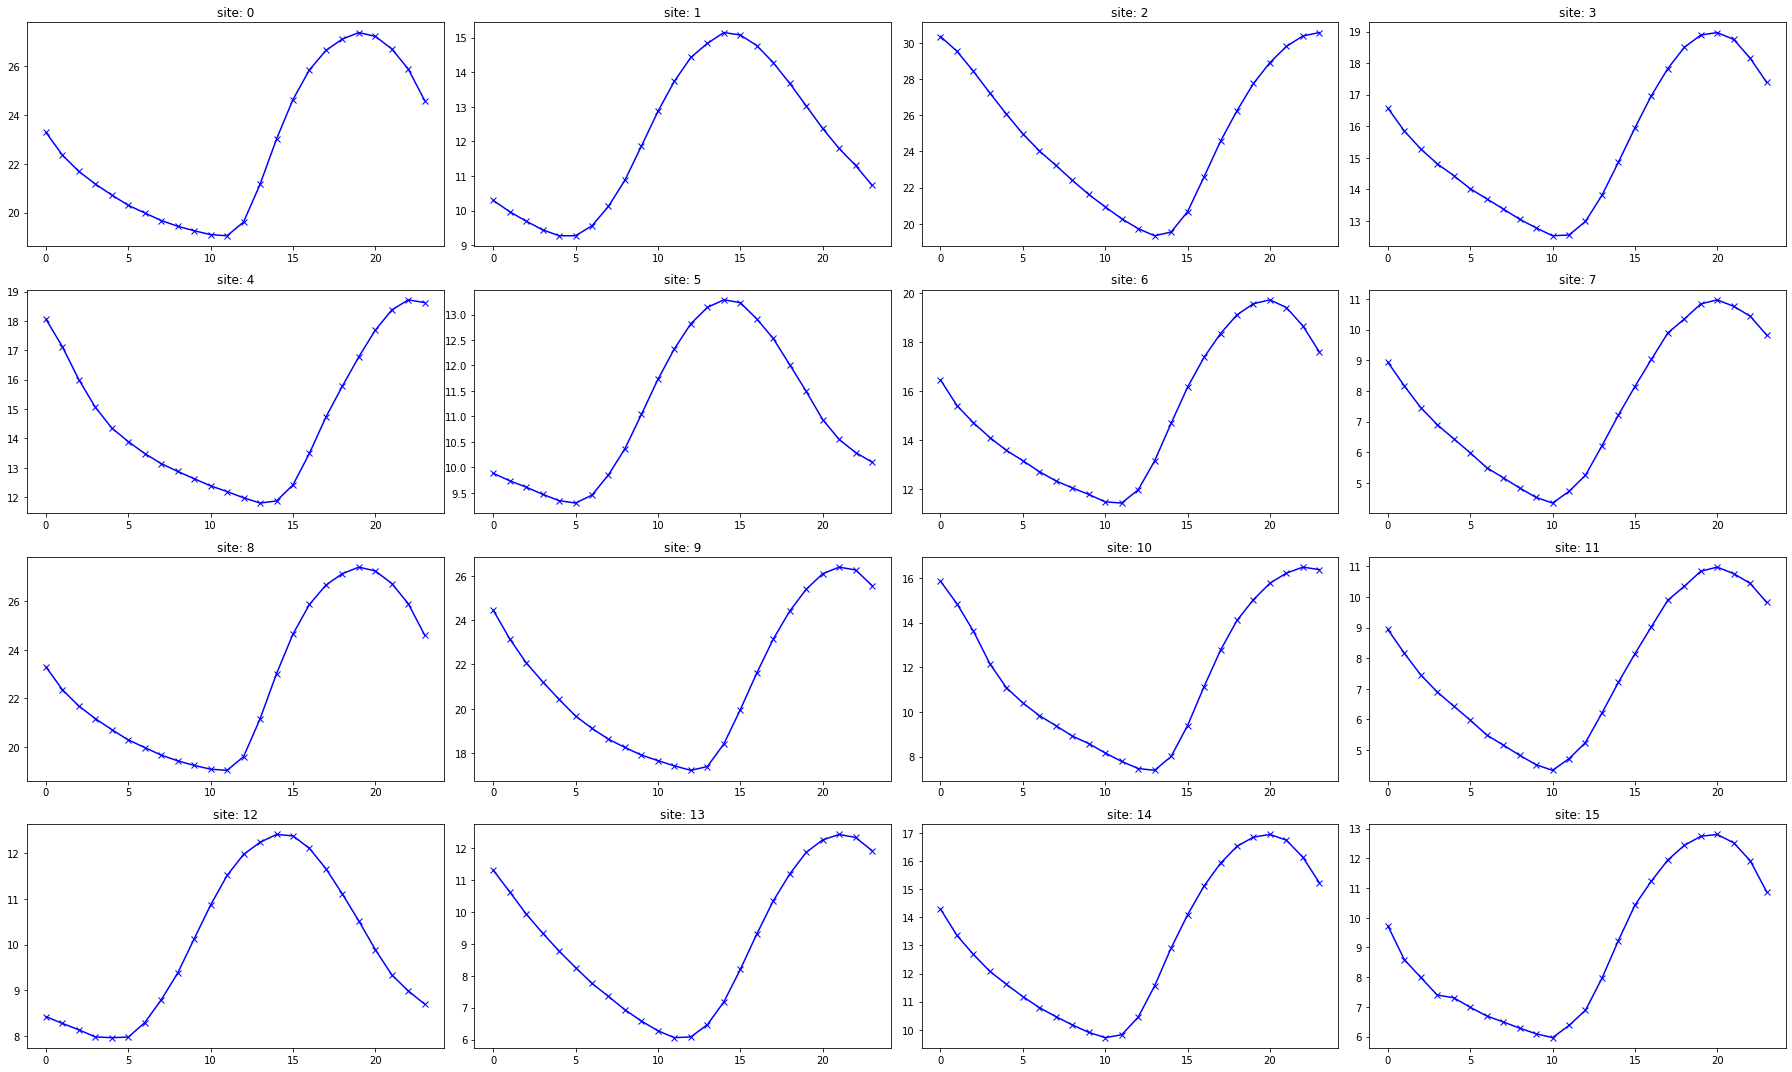

In [7]:
temp_skeleton = weather[weather_key + ['air_temperature']].drop_duplicates(subset=weather_key).sort_values(by=weather_key).copy()
data_to_plot = temp_skeleton.copy()
data_to_plot["hour"] = data_to_plot["timestamp"].dt.hour
count = 1
plt.figure(figsize=(25, 15))
for site_id, data_by_site in data_to_plot.groupby('site_id'):
    by_site_by_hour = data_by_site.groupby('hour').mean()
    ax = plt.subplot(4, 4, count)
    plt.plot(by_site_by_hour.index,by_site_by_hour['air_temperature'],'xb-')
    ax.set_title('site: '+str(site_id))
    count += 1
plt.tight_layout()
plt.show()

In [8]:
temp_skeleton.groupby(['site_id', temp_skeleton.timestamp.dt.date])['air_temperature'].rank('average').unique()

array([16. , 15. , 13. ,  9. ,  3.5,  2. ,  5.5,  1. , 12. , 14. , 18. ,
       19.5, 21.5, 23.5, 17. , 24. , 23. , 20.5, 18.5, 16.5, 13.5, 10. ,
        7. ,  4. ,  3. ,  5. ,  6. , 22. , 20. , 15.5,  2.5, 22.5, 11.5,
        7.5,  9.5,  4.5,  1.5, 19. , 21. , 12.5, 10.5,  8.5, 11. ,  8. ,
        nan, 17.5,  6.5, 14.5])

In [11]:
# calculate ranks of hourly temperatures within date/site_id chunks
temp_skeleton['temp_rank'] = temp_skeleton.groupby(['site_id', temp_skeleton.timestamp.dt.date])['air_temperature'].rank('average')

# create a dataframe of site_ids (0-16) x mean hour rank of temperature within day (0-23)
df_2d = temp_skeleton.groupby(['site_id', temp_skeleton.timestamp.dt.hour])['temp_rank'].mean().unstack(level=1)

# Subtract the columnID of temperature peak by 14, getting the timestamp alignment gap.
site_ids_offsets = pd.Series(df_2d.values.argmax(axis=1) - 14)
site_ids_offsets.index.name = 'site_id'

def timestamp_align(df):
    df['offset'] = df.site_id.map(site_ids_offsets)
    df['timestamp_aligned'] = (df.timestamp - pd.to_timedelta(df.offset, unit='H'))
    df['timestamp'] = df['timestamp_aligned']
    del df['timestamp_aligned']
    return df

In [12]:
df_2d.values.argmax(axis=1)

array([19, 14, 23, 20, 22, 14, 20, 20, 19, 21, 22, 20, 14, 21, 20, 20],
      dtype=int64)

In [13]:
site_ids_offsets+14-24

site_id
0     -5
1    -10
2     -1
3     -4
4     -2
5    -10
6     -4
7     -4
8     -5
9     -3
10    -2
11    -4
12   -10
13    -3
14    -4
15    -4
dtype: int64

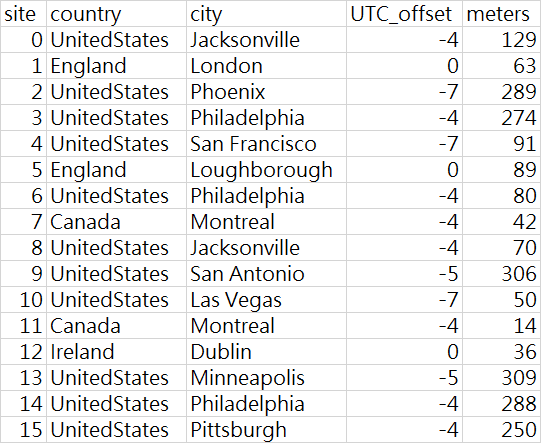

In [14]:
weather.site_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [15]:
df_2d

timestamp,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
site_id,,,,,,,,,,,,,,,,,,,,,
0,15.123175,13.351277,11.868157,10.541971,9.299270,7.907391,6.897354,5.782847,5.042922,4.430594,...,14.081661,16.429745,18.217609,19.564325,20.555201,21.162409,21.013686,19.938412,18.085310,15.528741
1,8.950691,7.786636,6.781049,5.786175,5.062557,4.993560,5.914443,7.679853,9.504604,12.055249,...,21.207948,21.104533,20.023105,18.373728,16.498612,14.616913,12.806377,11.278855,9.765869,8.133180
2,21.754562,20.260493,18.296804,16.325730,14.544252,12.886405,11.361314,10.010036,8.574361,7.144617,...,2.723084,5.034672,8.709398,11.976277,14.525091,16.870894,18.868613,20.568493,21.755474,22.093978
3,16.497715,14.732176,13.162409,11.897717,10.696347,9.474406,8.282192,7.164384,6.184307,5.220347,...,11.579836,13.933850,15.972172,17.749088,19.243613,20.200274,20.352511,19.704566,17.960310,15.894521
4,20.952425,19.079836,16.622719,14.306569,12.331661,10.831661,9.597628,8.402372,7.549360,6.820255,...,4.696624,6.607664,9.773266,13.172445,15.905566,18.035584,19.823449,21.186588,21.803832,21.501369
5,9.062095,8.491220,7.997692,7.461716,6.926199,6.691705,7.049815,8.276959,9.910978,12.172509,...,20.143514,19.839649,18.599537,17.022706,15.252089,13.423006,11.604898,10.344588,9.551105,8.967281
6,16.386093,14.572536,13.068431,11.704296,10.390768,9.168037,7.946527,6.844607,5.966667,5.209324,...,11.722831,14.281279,16.205936,17.940693,19.468037,20.508219,20.876832,20.161792,18.289954,15.754338
7,16.195570,14.469885,12.982364,11.843602,10.484630,9.453200,8.366509,7.306775,6.379278,5.549575,...,11.145793,13.195714,15.047115,16.580676,18.130332,19.243528,19.773206,19.385052,17.969466,16.013889
8,15.123175,13.351277,11.868157,10.541971,9.299270,7.907391,6.897354,5.782847,5.042922,4.430594,...,14.081661,16.429745,18.217609,19.564325,20.555201,21.162409,21.013686,19.938412,18.085310,15.528741
